c:\Users\kimid\AppData\Local\Programs\Python\Python39\lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\kimid\AppData\Local\Programs\Python\Python39\lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INF

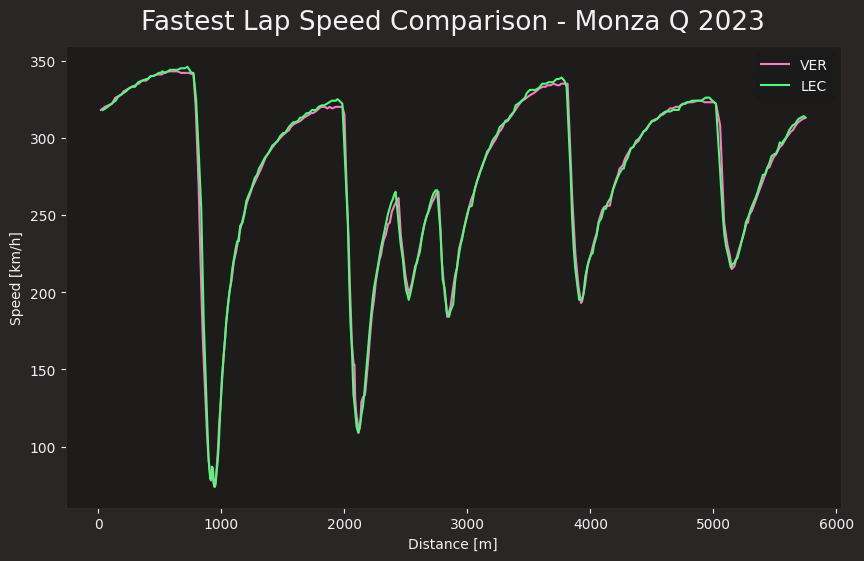

In [5]:
import fastf1
from fastf1.plotting import setup_mpl
import matplotlib.pyplot as plt

# Set up FastF1 plot style
setup_mpl()

# Enable cache so data is saved locally (no repeated downloads)
fastf1.Cache.enable_cache('../data')

# Load a session: e.g. Monza 2023 Qualifying
session = fastf1.get_session(2023, 'Monza', 'Q')
session.load()

# Pick drivers' fastest laps
ver = session.laps.pick_driver('VER').pick_fastest()
lec = session.laps.pick_driver('LEC').pick_fastest()

# Get telemetry
ver_tel = ver.get_car_data().add_distance()
lec_tel = lec.get_car_data().add_distance()

# Plot speed trace
plt.figure(figsize=(10,6))
plt.plot(ver_tel['Distance'], ver_tel['Speed'], label='VER')
plt.plot(lec_tel['Distance'], lec_tel['Speed'], label='LEC')
plt.xlabel('Distance [m]')
plt.ylabel('Speed [km/h]')
plt.legend()
plt.title('Fastest Lap Speed Comparison - Monza Q 2023')
plt.savefig('../notebooks/monza_q_speed.png')
plt.show()
